In [1]:
import pandas as pd
import os, shutil
import tensorflow as tf
import IPython.display as display
import numpy as np
import time
import functools
from sklearn.metrics import confusion_matrix, f1_score
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam, SGD
from keras.optimizers import RMSprop
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
import cv2
import time

# Load in Images

The data directories are comprised of the file path strings, one for each train, test, and split. Within the file paths are two folders. One folder has normal chest xray photos (no pneumonia) and another folder has chest xrays of people with pneumonia.

In [2]:
datadir_train = 'C:/Users/Raizel/Desktop/Flatiron/phase1/Project4/PneumoniaClassification/chest_xray/train'
datadir_test = 'C:/Users/Raizel/Desktop/Flatiron/phase1/Project4/PneumoniaClassification/chest_xray/test'
datadir_validate = 'C:/Users/Raizel/Desktop/Flatiron/phase1/Project4/PneumoniaClassification/chest_xray/val'
categories = ['NORMAL', 'PNEUMONIA']

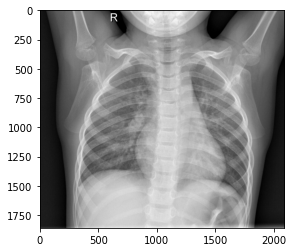

In [3]:
#within the train dataset, iterate through all images in the two folders
for category in categories: 
    path = os.path.join(datadir_train, category) #joins the images
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img)) #cv2.imread() loads an image
        plt.imshow(img_array)
        plt.show()
        break
    break

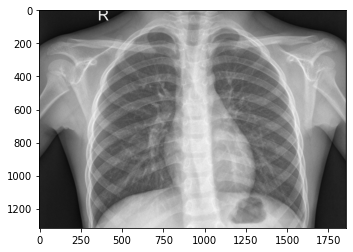

In [4]:
#within the test dataset, iterate through all images in the two folders
for category in categories: 
    path = os.path.join(datadir_test, category) #joins the images
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img)) #cv2.imread() loads an image
        plt.imshow(img_array)
        plt.show()
        break
    break

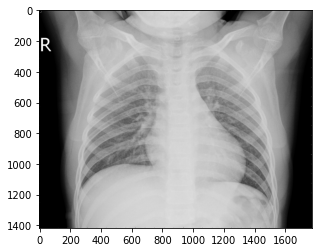

In [5]:
#within the validate dataset, iterate through all images in the two folders
for category in categories: 
    path = os.path.join(datadir_validate, category) #joins the images
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img)) #cv2.imread() loads an image
        plt.imshow(img_array)
        plt.show()
        break
    break

In [6]:
data_train = ImageDataGenerator(rescale=1./255).flow_from_directory( 
        datadir_train, 
        target_size=(224, 224), 
        batch_size = 5216, 
        seed = 123) 

Found 5216 images belonging to 2 classes.


In [7]:
data_test = ImageDataGenerator(rescale=1./255).flow_from_directory( 
        datadir_test, 
        target_size=(224, 224), 
        batch_size = 624, 
        seed = 123) 

Found 624 images belonging to 2 classes.


In [8]:
data_val = ImageDataGenerator(rescale=1./255).flow_from_directory( 
        datadir_validate, 
        target_size=(224, 224), 
        batch_size = 16, 
        seed = 12) 

Found 16 images belonging to 2 classes.


In [20]:
#split images and labels
# images, labels = next(data_train)

In [ ]:
# labels

In [10]:
# images[0][0][0]

array([0.227451, 0.227451, 0.227451], dtype=float32)

In [9]:
train_images, train_labels = next(data_train)
# test_images, test_labels = next(data_test)

In [11]:
test_images, test_labels = next(data_test)

In [17]:
val_images, val_labels = next(data_val)

In [20]:
train_images[:1]

array([[[[0.227451  , 0.227451  , 0.227451  ],
         [0.30588236, 0.30588236, 0.30588236],
         [0.3529412 , 0.3529412 , 0.3529412 ],
         ...,
         [0.3372549 , 0.3372549 , 0.3372549 ],
         [0.2901961 , 0.2901961 , 0.2901961 ],
         [0.31764707, 0.31764707, 0.31764707]],

        [[0.25490198, 0.25490198, 0.25490198],
         [0.2784314 , 0.2784314 , 0.2784314 ],
         [0.3921569 , 0.3921569 , 0.3921569 ],
         ...,
         [0.32156864, 0.32156864, 0.32156864],
         [0.28235295, 0.28235295, 0.28235295],
         [0.28627452, 0.28627452, 0.28627452]],

        [[0.2784314 , 0.2784314 , 0.2784314 ],
         [0.32156864, 0.32156864, 0.32156864],
         [0.34901962, 0.34901962, 0.34901962],
         ...,
         [0.32941177, 0.32941177, 0.32941177],
         [0.3019608 , 0.3019608 , 0.3019608 ],
         [0.26666668, 0.26666668, 0.26666668]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

In [22]:
train_labels[:4]

array([[1.],
       [0.],
       [0.],
       [0.]], dtype=float32)

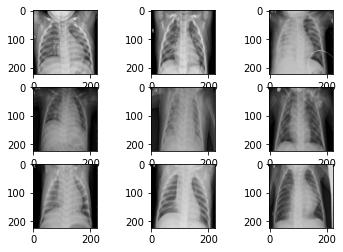

In [12]:
#visualize images
%matplotlib inline
import matplotlib.pyplot as plt

for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(train_images[i])
plt.show()

In [14]:
#reshape labels

train_labels = np.reshape(train_labels[:,0], (5216,1))

# Modeling

In [23]:
X_train = np.array(train_images)
y_train = np.array(train_images)

X_test = np.array(test_images)
y_test = np.array(test_images)

X_val = np.array(val_images)
Y_val = np.array(val_labels)

In [ ]:

model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu")) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu")) #rectified linear
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',
                optimizer="adam",
                metrics=['accuracy'])
model.fit(X, y, batch_size=32, epochs=3, validation_split=0.2)